In [101]:
!unrar taskForIntern


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Usage:     unrar <command> -<switch 1> -<switch N> <archive> <files...>
               <@listfiles...> <path_to_extract\>

<Commands>
  e             Extract files without archived paths
  l[t[a],b]     List archive contents [technical[all], bare]
  p             Print file to stdout
  t             Test archive files
  v[t[a],b]     Verbosely list archive contents [technical[all],bare]
  x             Extract files with full path

<Switches>
  -             Stop switches scanning
  @[+]          Disable [enable] file lists
  ad            Append archive name to destination path
  ag[format]    Generate archive name using the current date
  ai            Ignore file attributes
  ap<path>      Set path inside archive
  c-            Disable comments show
  cfg-          Disable read configuration
  cl            Convert names to lower case
  cu            Convert names to upper case
  dh            Open shared files
  e

In [102]:
!pip install unrar

In [103]:
!pip install pyunpack

In [104]:
!pip install patool

In [105]:
from pyunpack import Archive
Archive('/content/taskForIntern.rar').extractall('/content/Untitled Folder')

In [106]:
from pyunpack import Archive
Archive('/content/Untitled Folder/plan50.zip').extractall('/content/Untitled Folder 1')

In [107]:
import pandas as pd

In [108]:
df=pd.read_json('/content/Untitled Folder/final.json',lines=True)

In [109]:
df.head()

,document,annotation
0,"The house plan has two bedrooms, two washrooms, two balconys, one livingroom, and one kitchen. To be specific, floor of bedroom1 is Quartz and White, and wall is Wall_Cloth and Yellow. bedroom1 is...","[{'start': 19, 'end': 22, 'label': 'QUANT', 'text': 'two'}, {'start': 23, 'end': 31, 'label': 'ROOM', 'text': 'bedrooms'}, {'start': 33, 'end': 36, 'label': 'QUANT', 'text': 'two'}, {'start': 37, ..."
1,"House has one washroom, one livingroom, one study, two bedrooms, one kitchen, and one balcony. In practice, washroom1 has 5 squares in east. washroom1 wall is Green Pure_Color_Wood as well as floo...","[{'start': 10, 'end': 13, 'label': 'QUANT', 'text': 'one'}, {'start': 14, 'end': 22, 'label': 'ROOM', 'text': 'washroom'}, {'start': 24, 'end': 27, 'label': 'QUANT', 'text': 'one'}, {'start': 28, ..."
2,"House has three bedrooms, one washroom, one balcony, one livingroom, and one kitchen. Specifically, bedroom1 is in northwest with 15 square meters. bedroom1 has Blue Granite wall as well as uses G...","[{'start': 10, 'end': 15, 'label': 'QUANT', 'text': 'three'}, {'start': 16, 'end': 24, 'label': 'ROOM', 'text': 'bedrooms'}, {'start': 26, 'end': 29, 'label': 'QUANT', 'text': 'one'}, {'start': 30..."
3,"Building layout contains two bedrooms, one washroom, one balcony, one livingroom, and one kitchen. In practice, bedroom1 uses Purple Rock_Plate for floor, and wall is Green Quartz. bedroom1 has 15...","[{'start': 25, 'end': 28, 'label': 'QUANT', 'text': 'two'}, {'start': 29, 'end': 37, 'label': 'ROOM', 'text': 'bedrooms'}, {'start': 39, 'end': 42, 'label': 'QUANT', 'text': 'one'}, {'start': 43, ..."
4,"Building layout contains three bedrooms, two washrooms, two balconys, one livingroom, and one kitchen. Specifically, bedroom1 floor is Green Granite as well as wall is Pure_Color_Wood and Yellow. ...","[{'start': 25, 'end': 30, 'label': 'QUANT', 'text': 'three'}, {'start': 31, 'end': 39, 'label': 'ROOM', 'text': 'bedrooms'}, {'start': 41, 'end': 44, 'label': 'QUANT', 'text': 'two'}, {'start': 45..."


In [111]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [112]:
import spacy
text=[]
nlp = spacy.load('en_core_web_sm')
for docm in df.document:
  doc = nlp(docm)
  text.append(doc)
  
  for tok in doc:
    text.append(tok.text)
    print(tok.text, "...", tok.dep_)





Streaming output truncated to the last 5000 lines.
4 ... nummod
square ... amod
meters ... dobj
located ... acl
in ... prep
west ... pobj
. ... punct
wall ... nsubj
of ... prep
balcony1 ... pobj
is ... ROOT
Quartz ... attr
and ... cc
Orange ... conj
while ... mark
has ... advcl
Green ... compound
Quartz ... compound
floor ... dobj
. ... punct
balcony1 ... nsubj
covers ... ROOT
4 ... nummod
square ... amod
meters ... dobj
located ... acl
in ... prep
northeast ... pobj
. ... punct
livingroom1 ... nsubj
covers ... ROOT
30 ... nummod
square ... amod
meters ... dobj
located ... acl
in ... prep
east ... pobj
. ... punct
livingroom1 ... amod
wall ... nsubj
is ... ROOT
Gray ... compound
Stone_Brick ... attr
as ... advmod
well ... advmod
as ... cc
has ... conj
Wood_color ... nummod
Cement_Board ... amod
floor ... dobj
. ... punct
Besides ... advmod
, ... punct
floor ... nsubj
of ... prep
kitchen1 ... pobj
is ... ROOT
Bamboo_Vine ... attr
and ... cc
Black ... conj
, ... punct
and ... cc
wall ...

In [113]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [114]:
df.iloc[0,:1]

document    The house plan has two bedrooms, two washrooms, two balconys, one livingroom, and one kitchen. To be specific, floor of bedroom1 is Quartz and White, and wall is Wall_Cloth and Yellow. bedroom1 is...
Name: 0, dtype: object

In [115]:
a=len(df.document)

In [124]:
entity_pairs = []

for i in tqdm(df.document):
  entity_pairs.append(get_entities(i))
    

100%|██████████| 50/50 [00:01<00:00, 27.87it/s]


In [125]:
entity_pairs[0:10]

[['washroom2', 'washroom2'],
 ['kitchen1', '7  south'],
 ['kitchen1', 'square  meters'],
 ['bedroom2', 'square  north'],
 ['washroom2', 'square  meters'],
 ['washroom2', 'bedroom2'],
 ['kitchen1', 'Purple Ceramic_Tile floor'],
 ['closet1', 'washroom2'],
 ['washroom2', 'livingroom2'],
 ['bedroom2  bedroom1', 'square  meters']]

In [126]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [119]:
relations = []


for i in tqdm(df["document"]):
  relations.append(get_relation(i))

100%|██████████| 50/50 [00:01<00:00, 27.89it/s]


In [120]:
relations[0:10]
len(relations)

50

In [121]:
pd.Series(relations).value_counts()[:50]

is adjacent    19
is next        15
connected      15
balcony2        1
dtype: int64

In [127]:
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

,source,target,edge
0,washroom2,washroom2,connected
1,kitchen1,7 south,is next
2,kitchen1,square meters,connected
3,bedroom2,square north,is adjacent
4,washroom2,square meters,connected
5,washroom2,bedroom2,connected
6,kitchen1,Purple Ceramic_Tile floor,balcony2
7,closet1,washroom2,is next
8,washroom2,livingroom2,is next
9,bedroom2 bedroom1,square meters,is next


In [128]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

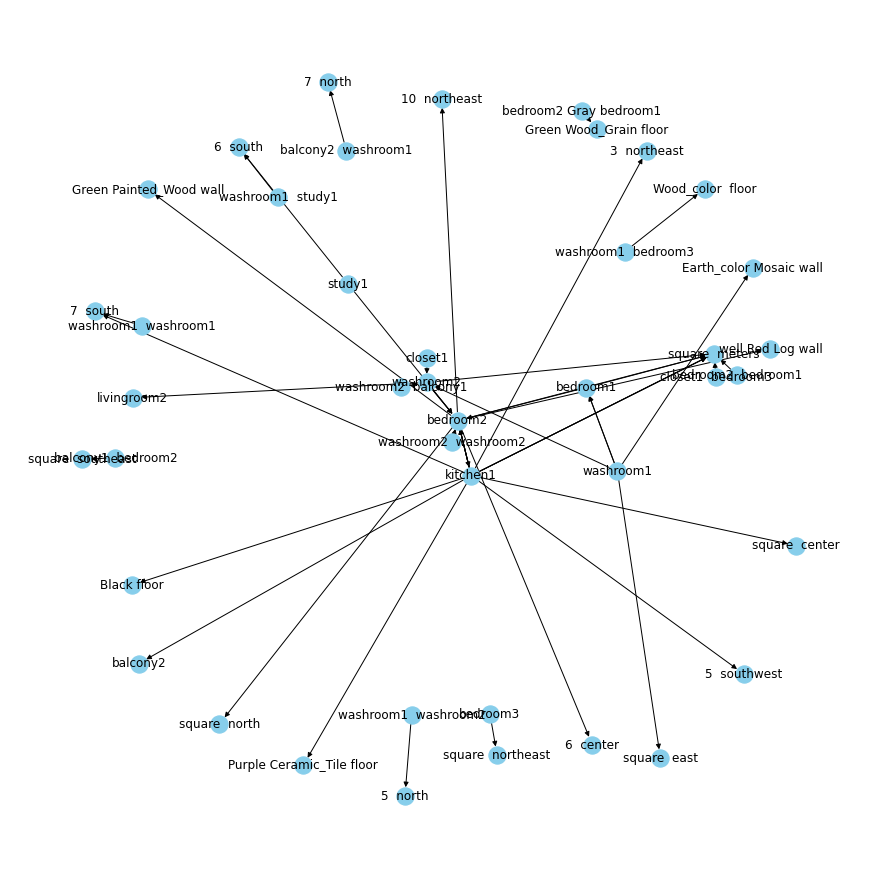

In [129]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [130]:
def display_graph(relation):

  G=nx.from_pandas_edgelist(kg_df[kg_df['edge']==relation], "source", "target", 
                            edge_attr=True, create_using=nx.MultiDiGraph())

  plt.figure(figsize=(12,12))
  pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
  nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
  plt.show()

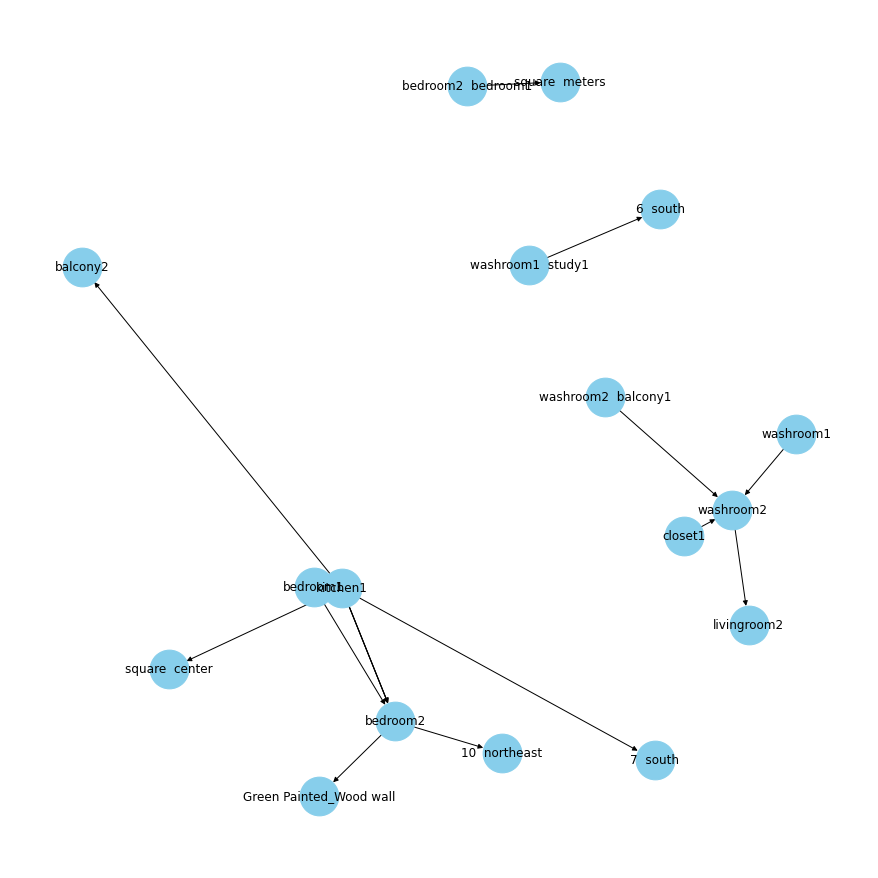

In [131]:
display_graph("is next")

In [132]:

def display_graph(relation):
  plt.figure(figsize=(12,12))

  pos = nx.spring_layout(G)
  nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
  plt.show()

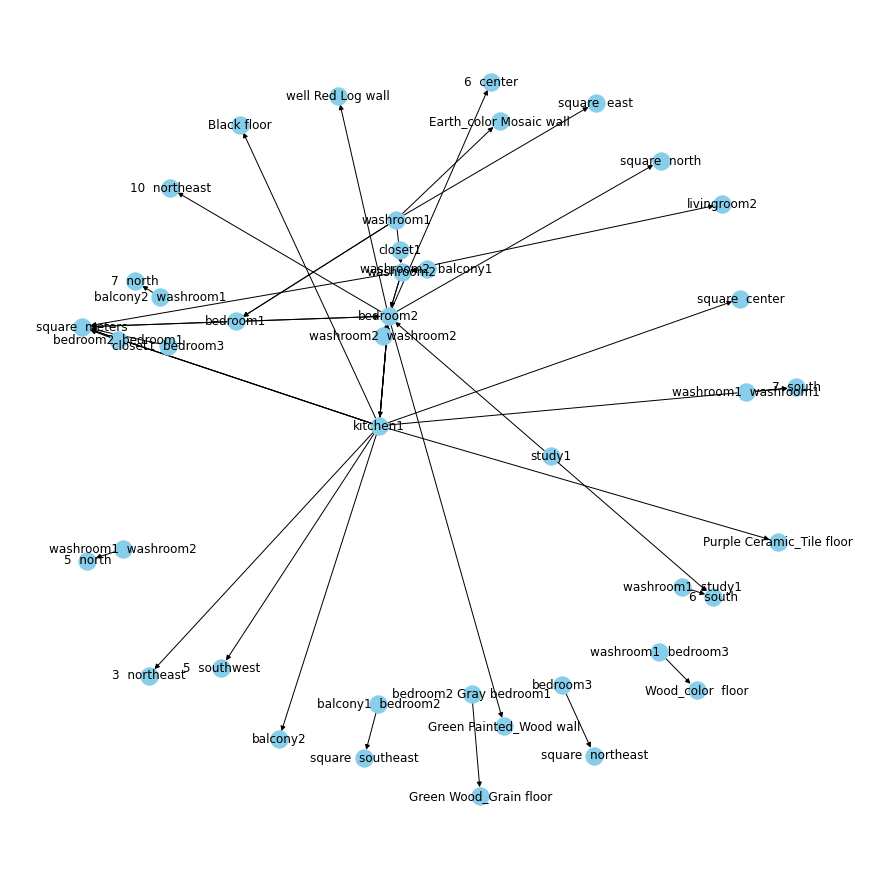

In [133]:
display_graph("connected")

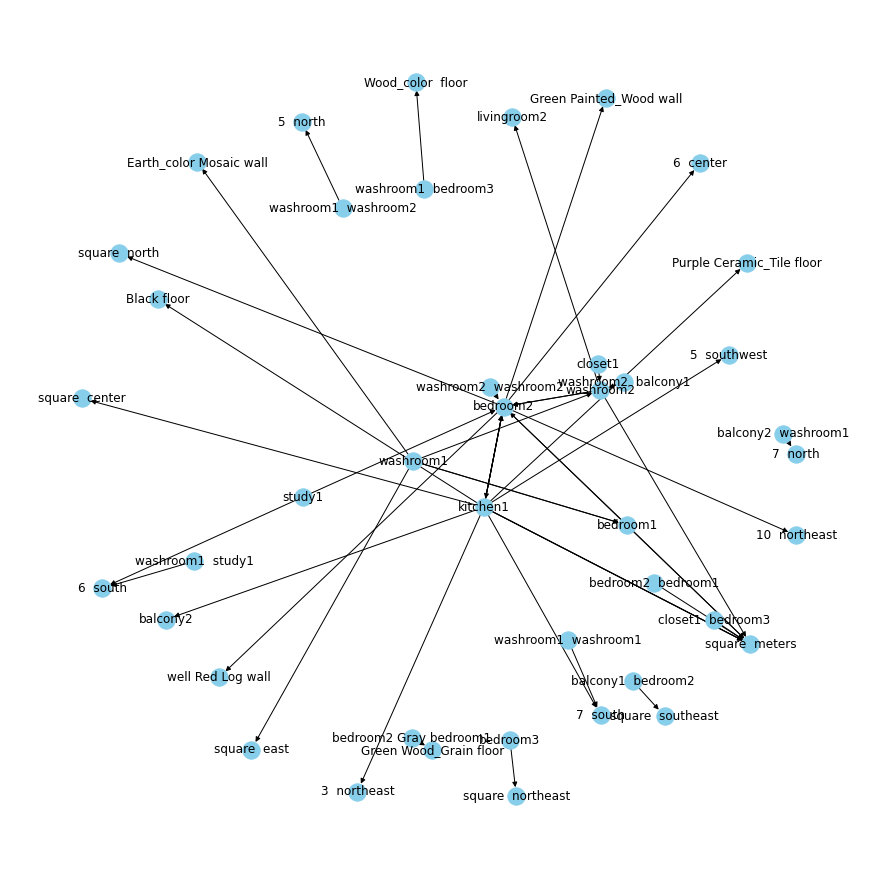

In [134]:
display_graph("is adjacent")